In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey
import seaborn as sns

In [ ]:
df = pd.read_csv(r"C:\Users\keert\Downloads\Data (2).csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26052 entries, 0 to 26051
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26052 non-null  int64 
 1   City       26052 non-null  object
 2   Date       26052 non-null  object
 3   Card Type  26052 non-null  object
 4   Exp Type   26052 non-null  object
 5   Gender     26052 non-null  object
 6   Amount     26052 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


In [ ]:
df.head(10)

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574
5,5,"Delhi, India",8-Sep-14,Silver,Bills,F,100036
6,6,"Delhi, India",24-Feb-15,Gold,Bills,F,143250
7,7,"Greater Mumbai, India",26-Jun-14,Platinum,Bills,F,150980
8,8,"Delhi, India",28-Mar-14,Silver,Bills,F,192247
9,9,"Delhi, India",1-Sep-14,Platinum,Bills,F,67932


In [ ]:
df.describe()

,index,Amount
count,26052.000000,26052.000000
mean,13025.500000,156411.537425
std,7520.708943,103063.254287
min,0.000000,1005.000000
25%,6512.750000,77120.250000
50%,13025.500000,153106.500000
75%,19538.250000,228050.000000
max,26051.000000,998077.000000


In [ ]:
# Total spending based on the Card Type

spend_cardtype = df.groupby('Card Type')['Amount'].sum()
print(spend_cardtype)

Card Type
Gold          984539536
Platinum     1007639019
Signature    1013041105
Silver       1069613713
Name: Amount, dtype: int64


C:\Users\keert\AppData\Local\Temp\ipykernel_20080\1447116592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Card Type', y='Amount', data=df, palette='Set1')


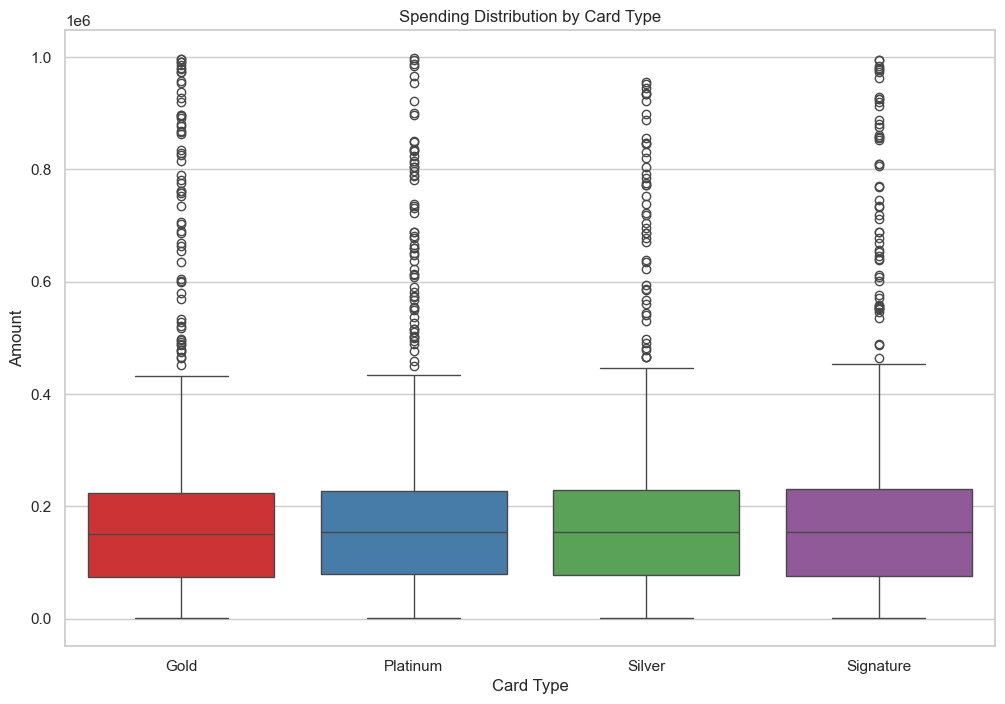

C:\Users\keert\AppData\Local\Temp\ipykernel_20080\1447116592.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Card Type', y='Amount', data=df, palette='Set1')


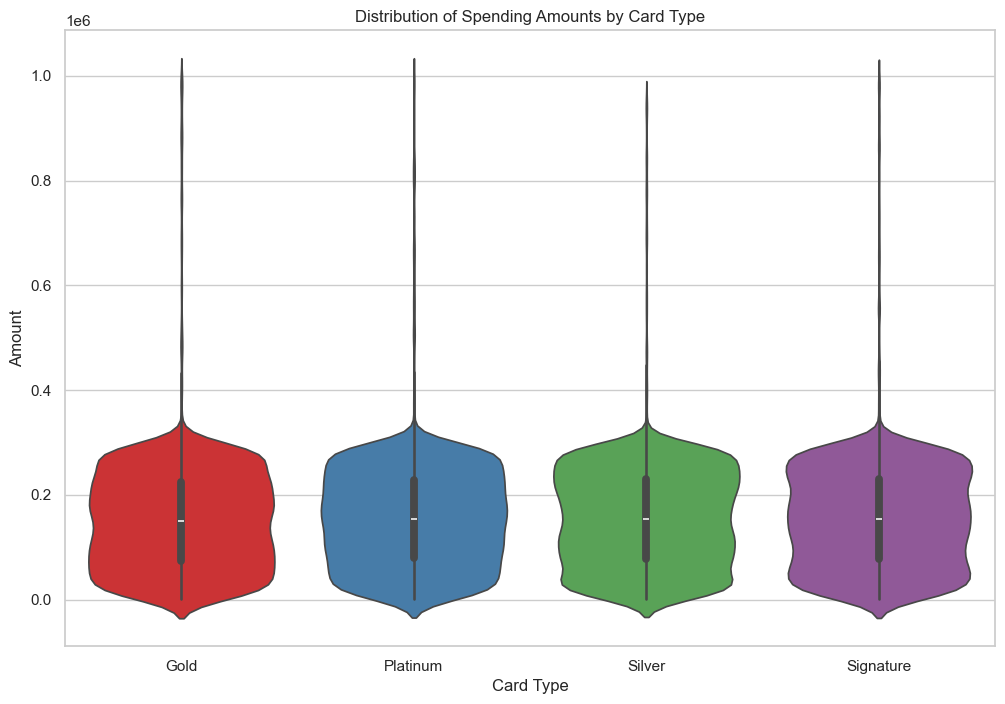

In [ ]:
sns.set(style="whitegrid")

# Create a box plot to show spending distribution by Card Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Card Type', y='Amount', data=df, palette='Set1')
plt.title('Spending Distribution by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Amount')
plt.show()

# Create a violin plot to show spending distribution by Card Type
plt.figure(figsize=(12, 8))
sns.violinplot(x='Card Type', y='Amount', data=df, palette='Set1')
plt.title('Distribution of Spending Amounts by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Amount')
plt.show()

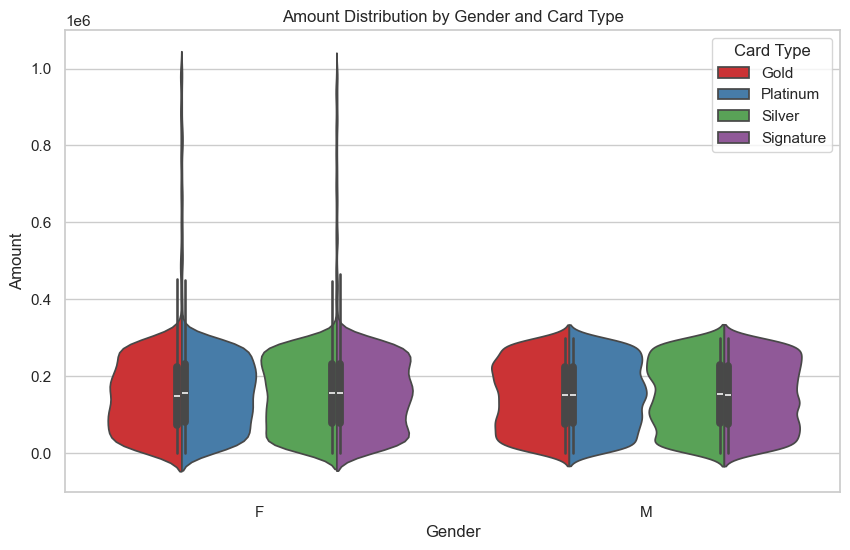

In [ ]:
# AMOUNT DISTRIBUTION BY GENDER AND CARD TYPE

plt.figure(figsize=(10, 6))
sns.violinplot(x='Gender', y='Amount', hue='Card Type', split=True, palette='Set1', data=df)
plt.title('Amount Distribution by Gender and Card Type')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.legend(title='Card Type')


C:\Users\keert\AppData\Local\Temp\ipykernel_20080\553133640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Card Type', data=df, palette='pastel')


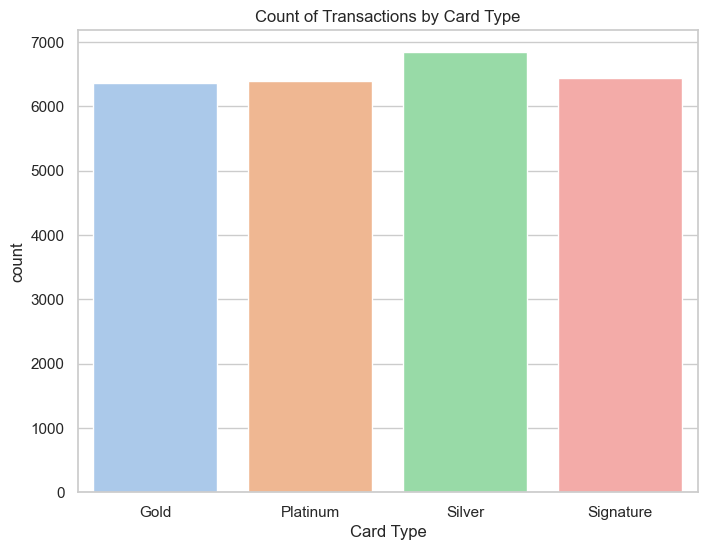

In [ ]:
# Count Plot of Card Types: Show the distribution of card types.

plt.figure(figsize=(8, 6))
sns.countplot(x='Card Type', data=df, palette='pastel')
plt.title('Count of Transactions by Card Type')
plt.show()



C:\Users\keert\AppData\Local\Temp\ipykernel_20080\2507331676.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


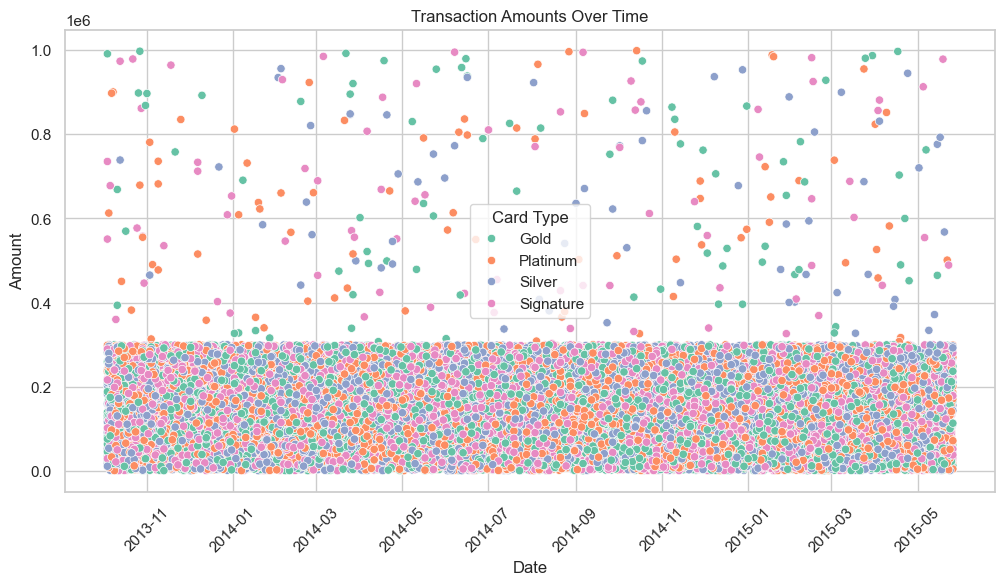

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Amount', data=df, hue='Card Type', palette='Set2')
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Card Type')
plt.show()

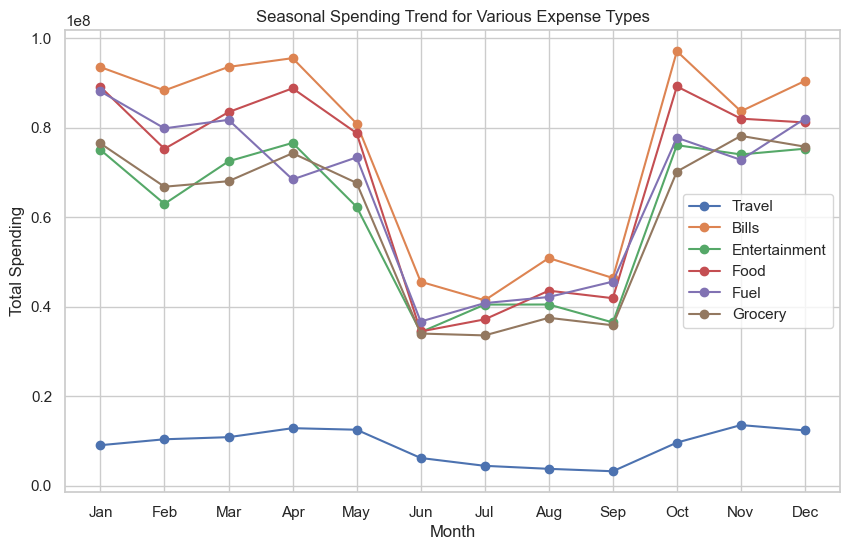

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' column is already in datetime format
df['Month'] = df['Date'].dt.month

# Create a dictionary to store data for each expense type
expense_types = ['Travel', 'Bills', 'Entertainment', 'Food', 'Fuel', 'Grocery']
expense_data = {}

# Filter DataFrame and calculate monthly spending for each expense type
for exp_type in expense_types:
    exp_df = df[df['Exp Type'] == exp_type]
    monthly_spending = exp_df.groupby('Month')['Amount'].sum()
    expense_data[exp_type] = monthly_spending

# Plot the seasonal spending trend for all expense types
plt.figure(figsize=(10, 6))
for exp_type, data in expense_data.items():
    data.plot(marker='o', linestyle='-', label=exp_type.capitalize())

plt.title('Seasonal Spending Trend for Various Expense Types')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


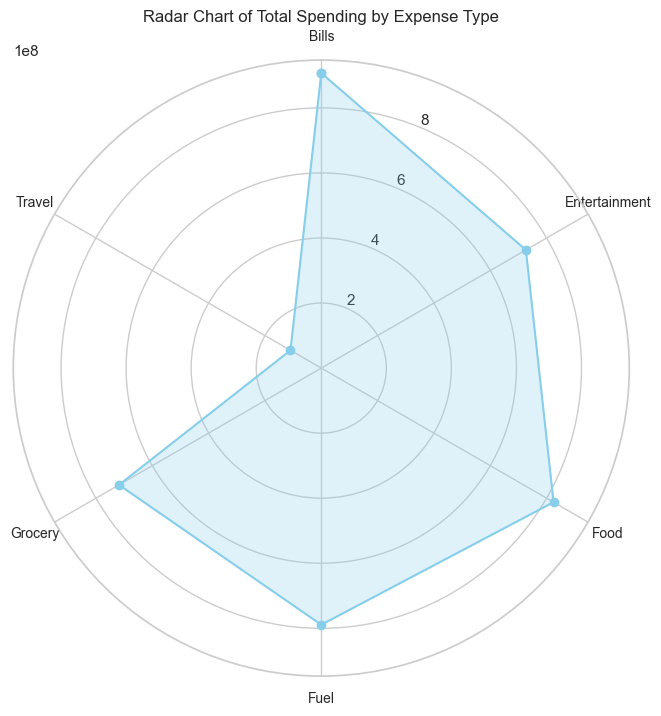

In [ ]:
from math import pi

# Create a radar chart
plt.figure(figsize=(8, 8))
categories = total_spending.index
values = total_spending.values
num_categories = len(categories)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
values = np.concatenate((values,[values[0]]))
angles += angles[:1]
plt.polar(angles, values, marker='o', color='skyblue')
plt.fill(angles, values, color='skyblue', alpha=0.25)
plt.title('Radar Chart of Total Spending by Expense Type')
plt.gca().set_theta_zero_location('N')
plt.gca().set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=10)
plt.show()


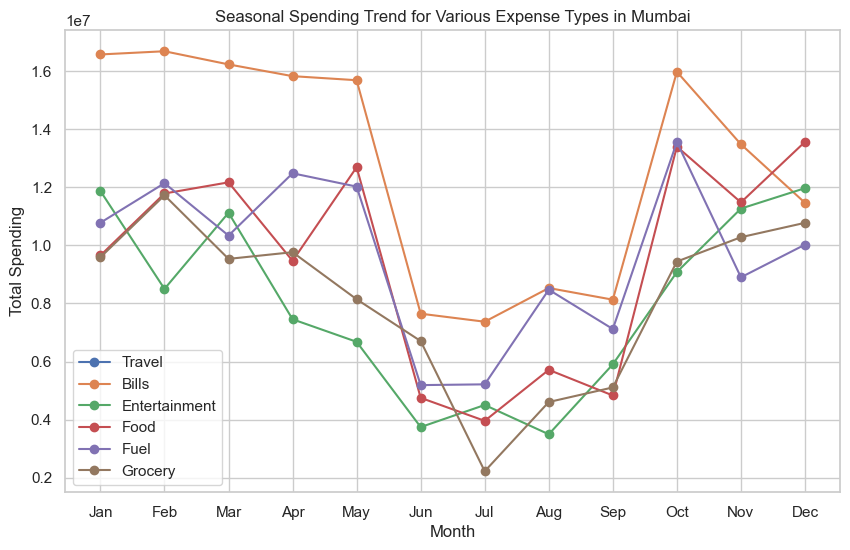

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' column is already in datetime format
df['Month'] = df['Date'].dt.month

# Filter DataFrame for transactions in Mumbai
mumbai_df = df[df['City'] == 'Greater Mumbai, India']

# Create a dictionary to store data for each expense type
expense_types = ['Travel', 'Bills', 'Entertainment', 'Food', 'Fuel', 'Grocery']
expense_data = {}

# Filter DataFrame and calculate monthly spending for each expense type in Mumbai
for exp_type in expense_types:
    exp_df = mumbai_df[mumbai_df['Exp Type'] == exp_type]
    monthly_spending = exp_df.groupby('Month')['Amount'].sum()
    expense_data[exp_type] = monthly_spending

# Plot the seasonal spending trend for all expense types in Mumbai
plt.figure(figsize=(10, 6))
for exp_type, data in expense_data.items():
    data.plot(marker='o', linestyle='-', label=exp_type.capitalize())

plt.title('Seasonal Spending Trend for Various Expense Types in Mumbai')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.show()


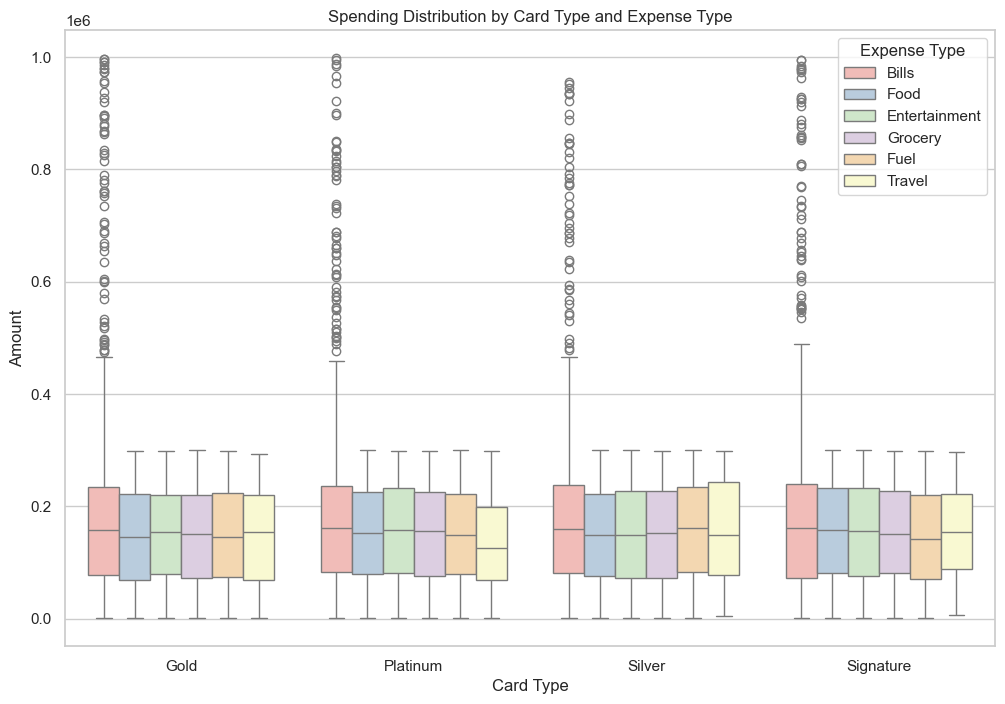

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Card Type', y='Amount', hue='Exp Type', data=df, palette='Pastel1')
plt.title('Spending Distribution by Card Type and Expense Type')
plt.xlabel('Card Type')
plt.ylabel('Amount')
plt.legend(title='Expense Type', loc='upper right')
plt.show()

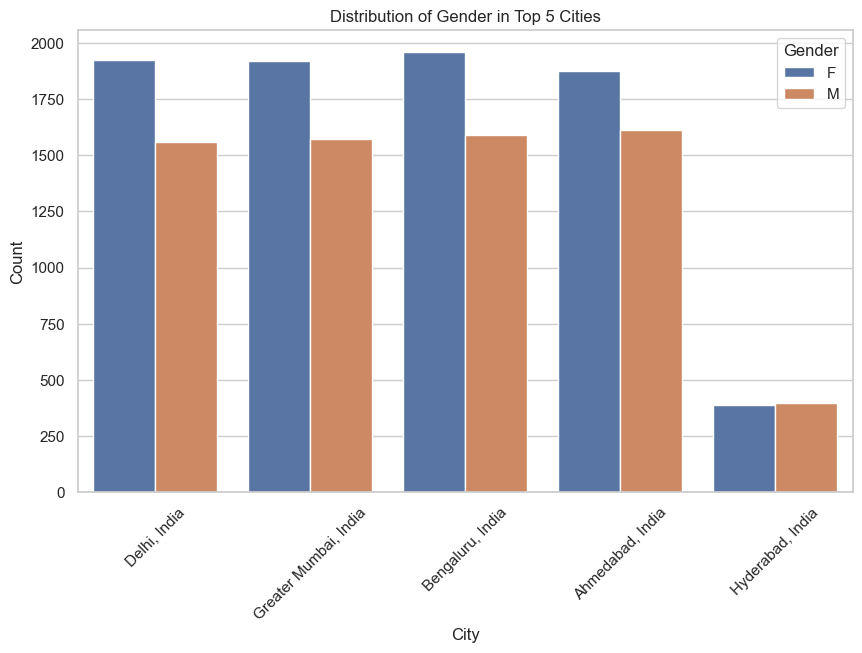

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Find the top 5 cities based on the number of occurrences
top_cities = df['City'].value_counts().head(5).index

# Filter the DataFrame for the top 5 cities
df_top_cities = df[df['City'].isin(top_cities)]

# Create a count plot to visualize the distribution of genders within the top 5 cities
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_cities, x='City', hue='Gender')
plt.title('Distribution of Gender in Top 5 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


In [ ]:
card_type_counts = df['Card Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
squarify.plot(sizes=card_type_counts.values, label=card_type_counts.index, alpha=0.7)
plt.axis('off')

In [ ]:
card_type_counts = df['Card Type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
squarify.plot(sizes=card_type_counts.values, label=card_type_counts.index, alpha=0.7)
plt.axis('off')

In [ ]:
sns.set(style="whitegrid")

# Spending distribution by Expense Type and Gender
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Exp Type', y='Amount', hue='Gender', data=df, palette='Set2')
plt.title('Spending Distribution by Expense Type and Gender')
plt.xlabel('Expense Type')
plt.ylabel('Amount')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Create a box plot to show spending distribution by Card Type and Expense Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Card Type', y='Amount', hue='Exp Type', data=df, palette='Pastel1')
plt.title('Spending Distribution by Card Type and Expense Type')
plt.xlabel('Card Type')
plt.ylabel('Amount')
plt.legend(title='Expense Type', loc='upper right')
plt.show()